# Importing Libraries and Modules

In [ ]:
import pandas as pd # Reading Dataset

import numpy as np # Operation on Datasets

import matplotlib.pyplot as plt #Visualization Library

import seaborn as sns # Enhanced Visualization Library

from statsmodels.stats.outliers_influence import variance_inflation_factor # Handling Multicollinearity

from sklearn.preprocessing import StandardScaler, LabelEncoder 

from sklearn.linear_model import LogisticRegressionCV

from sklearn.svm import SVC 

from sklearn.model_split import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier # Boosting Model Classsification

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.neural_network import MLPClassifier #Neural Networks Classidication



: 

##  Information about  Dataset

In [6]:
# Information about the Dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [3]:
# Reading throuth the Dataset

import pandas as pd
titanic_df = pd.read_csv('C:/Users/WebXpert/Boot Camp Data Science wk1/SVMtrain.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,...,Parch,Fare,Embarked
0,1,0,3,...,0,7.2500,3
1,2,1,1,...,0,71.2833,1
2,3,1,3,...,0,7.9250,3
3,4,1,1,...,0,53.1000,3
4,5,0,3,...,0,8.0500,3


## Describe dataset

In [2]:
import pandas as pd

titanic_df = pd.read_csv('C:/Users/WebXpert/Boot Camp Data Science wk1/SVMtrain.csv')
pd.options.display.max_columns = 6
titanic_df.describe()

,PassengerId,Survived,Pclass,...,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,...,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,...,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,...,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,...,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,...,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,...,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,...,6.000000,512.329200,3.000000


In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic_df = pd.read_csv('C:/Users/WebXpert/Boot Camp Data Science wk1/SVMtrain.csv')

titanic_df.groupby('Sex')[['Survived']].mean()


,Survived
Sex,
Male,0.188908
female,0.740385


In [31]:
titanic_df.groupby(['Sex', 'Pclass'])['Survived'].aggregate('mean').unstack()

Pclass,1,2,3
Sex,,,
Male,0.368852,0.157407,0.135447
female,0.967391,0.921053,0.500000


## Plotting our Data

Text(0, 0.5, 'Fare')

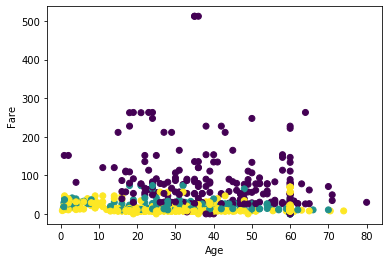

In [17]:

titanic_df = pd.read_csv('C:/Users/WebXpert/Boot Camp Data Science wk1/SVMtrain.csv')
plt.scatter(titanic_df['Age'], titanic_df['Fare'], c=titanic_df['Pclass'])

#Purple dot First Class
#Green Dots Second Class
#Yellow Dots Thirds

plt.xlabel('Age')
plt.ylabel('Fare')

## Line plotting separating Passenger class

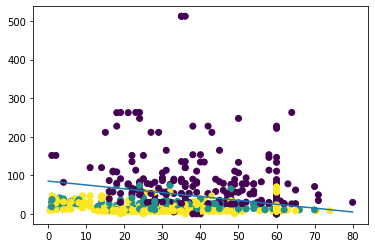

In [21]:
titanic_df = pd.read_csv('C:/Users/WebXpert/Boot Camp Data Science wk1/SVMtrain.csv')

plt.scatter(titanic_df['Age'], titanic_df['Fare'], c=titanic_df['Pclass'])

plt.plot([0, 80], [85, 5])

## Data Visualization 

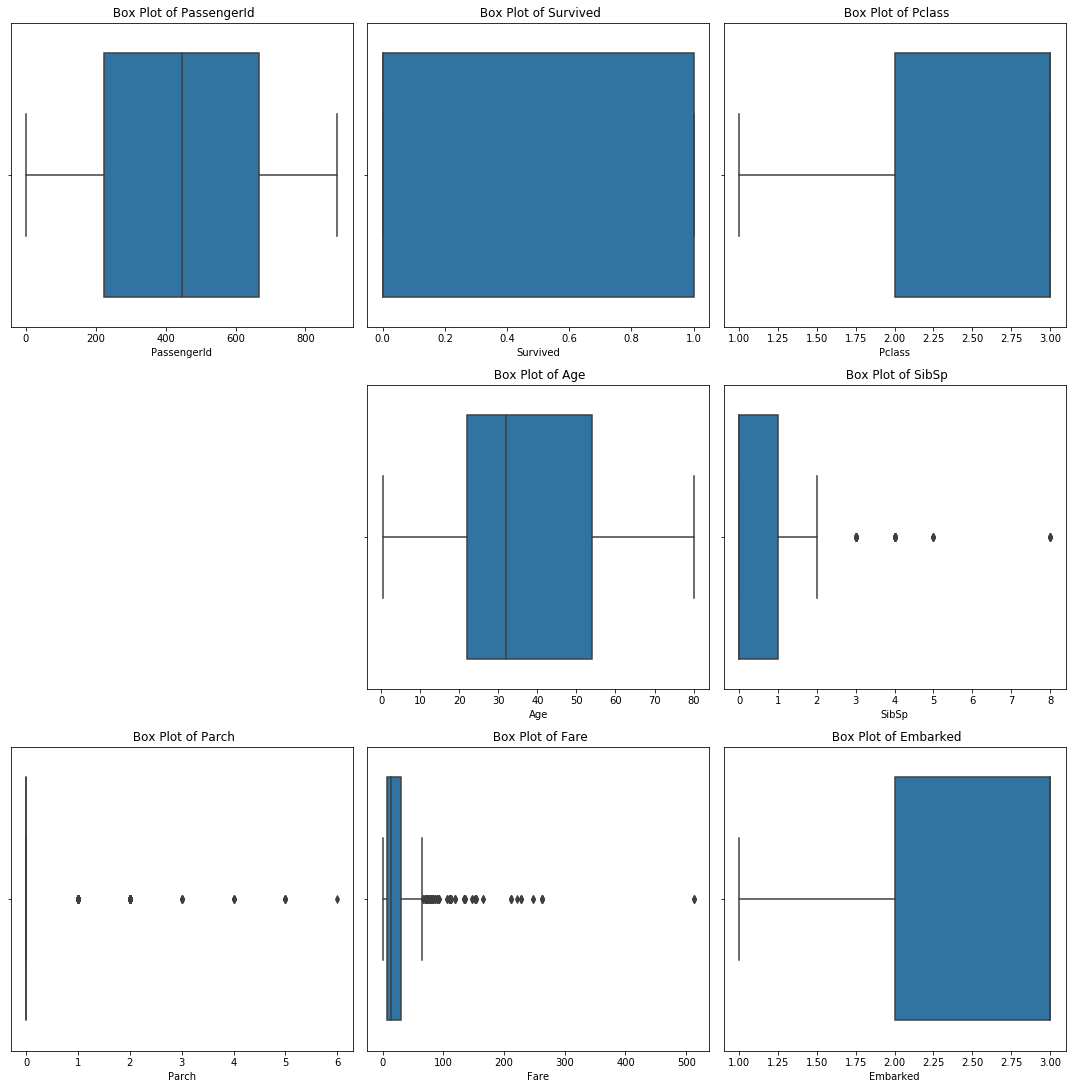

In [16]:
import warnings

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

titanic_df = pd.read_csv('C:/Users/WebXpert/Boot Camp Data Science wk1/SVMtrain.csv')

# To suppress all warnings
warnings.filterwarnings('ignore')
# Checking distibution of the various features in the dataset

num_cols = titanic_df.shape[1]
num_rows = (num_cols + 2) # Calculate the number of rows needed

plt.figure(figsize = (15, 5 * num_rows)) # Adjuct the figure size baded on the number of rows 

for i, col in enumerate(titanic_df, 1):
    
    if titanic_df[col].dtype != 'object':

        plt.subplot(num_rows, 3, i) # 3 columns per rows

        sns.boxplot(x=titanic_df[col], orient = 'horizontal')
        plt.title(f' Box Plot of {col}')

        plt.tight_layout()
        



## Histograms

AttributeError: module 'seaborn' has no attribute 'histplot'

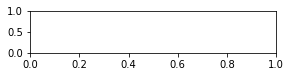

In [9]:
#More on Visualizations
import matplotlib.pyplot as plt

import seaborn as sns

titanic_df = pd.read_csv('C:/Users/WebXpert/Boot Camp Data Science wk1/SVMtrain.csv')

plt.figure(figsize=(15, 10))

for i, col in enumerate(titanic_df, 1):
  if titanic_df[col].dtype != 'object':
        plt.subplot(num_rows, 3 , i)
        
        sns.histplot(titanic_df[col], kde = True) # Create a Histogram with a kernel density estimate

        plt.title(f' Histogram of {col}')

        plt.tight_layout()

## Score the Model

In [18]:
# Showing how good our model is by counting the number of datapoint it predicts correctly

#This is the Accuracy score.

import pandas as pd

from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('C:/Users/WebXpert/Boot Camp Data Science wk1/SVMtrain.csv')

titanic_df['male'] = titanic_df['Sex'] == 'male'

X = titanic_df[['Pclass', 'male', 'SibSp', 'Age', 'Parch', 'Fare']].values

y = titanic_df['Survived'].values

model = LogisticRegression()

model.fit(X, y)

y_pred = model.predict(X)

print((y == y_pred).sum())
print((y ==  y_pred).sum() / y.shape[0])

print(model.score(X, y))






631
0.7097862767154106
0.7097862767154106


In [ ]:
#Split the model
X_train, X_test, y_train, y_test = train_test_split()
